### Evaluate Trained Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from ultralytics import YOLO
import os
import cv2
import zipfile
import random
import shutil

### Unzip test data

In [2]:
def unzip_images_only(zip_file_path, dest_dir, images_location):
    """
    Unzips only the 'images' folder from a given zip file to the specified destination directory.
    It extracts all images from the 'WIDER_train/images' folder and places them directly into 'dest_dir/images'.

    Parameters:
    zip_file_path (str): Path to the zip file to be extracted.
    dest_dir (str): Directory where the images should be extracted, into a subdirectory named 'images'.
    images_location (str): The folder path inside the zip file where images are located.
    """
    # Define the full path for the 'images' subdirectory
    images_dest_dir = os.path.join(dest_dir, 'images')

    # Ensure the 'images' subdirectory exists
    if not os.path.exists(images_dest_dir):
        os.makedirs(images_dest_dir)

    # Open the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for file_info in zip_ref.infolist():
            # Extract only files from the specified 'images_location' folder
            if file_info.filename.startswith(images_location) and not file_info.is_dir():
                # Flatten the structure by moving all images directly into 'images_dest_dir'
                # Extract the filename only (ignore subdirectories)
                filename = os.path.basename(file_info.filename)
                target_path = os.path.join(images_dest_dir, filename)
                
                # Extract the file to the target path
                with zip_ref.open(file_info) as source, open(target_path, 'wb') as target:
                    target.write(source.read())

        print(f"Extracted all images from '{zip_file_path}' to '{images_dest_dir}' successfully, with flattened directory structure.")

# Unzip test data
if not os.path.exists('Test'):
    os.makedirs('Test')

if not os.path.exists('Test/images'):
    os.makedirs('Test/images')

zip_file_path_train = 'WIDER_test.zip'
dest_dir_train = 'Test'
images_location_train = 'WIDER_test/images/'

if not os.listdir('Test/images'):
    unzip_images_only(zip_file_path_train, dest_dir_train, images_location_train)

In [17]:
trained_model = YOLO('runs/detect/train7/weights/best.pt')
model = YOLO('yolov8n.pt')

Randomly selected image: Test/images/35_Basketball_playingbasketball_35_145.jpg

image 1/1 C:\Users\Alfred Aronsson\SSY340-Project\object-detection\Test\images\35_Basketball_playingbasketball_35_145.jpg: 448x640 4 faces, 124.9ms
Speed: 4.0ms preprocess, 124.9ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


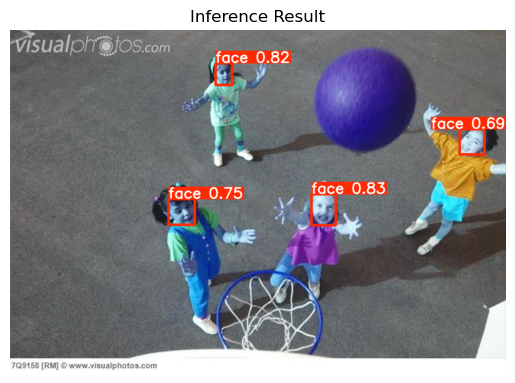

In [13]:
# Define the path to the images directory
images_dir = 'Test/images/'

# List all image files in the directory (directly under images_dir)
image_files = [os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith('.jpg')]

# Ensure there are images available
if len(image_files) == 0:
    print("No images found in the directory.")
else:
    # Randomly select an image from the list
    random_image = random.choice(image_files)
    print(f"Randomly selected image: {random_image}")

    # Run inference on the selected image
    results = trained_model.predict(source=random_image, save=False, show=False)  # Disable saving and showing
    result_image = results[0].plot()  # This returns a NumPy array of the image with bounding boxes

    # Display the result in the notebook
    plt.imshow(result_image)
    plt.axis('off')
    plt.title('Inference Result')
    plt.show()

### Crop Picture Within Bounding Box

Randomly selected image: Test/images/29_Students_Schoolkids_Students_Schoolkids_29_1.jpg

image 1/1 C:\Users\Alfred Aronsson\SSY340-Project\object-detection\Test\images\29_Students_Schoolkids_Students_Schoolkids_29_1.jpg: 512x640 8 faces, 144.5ms
Speed: 5.0ms preprocess, 144.5ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 640)


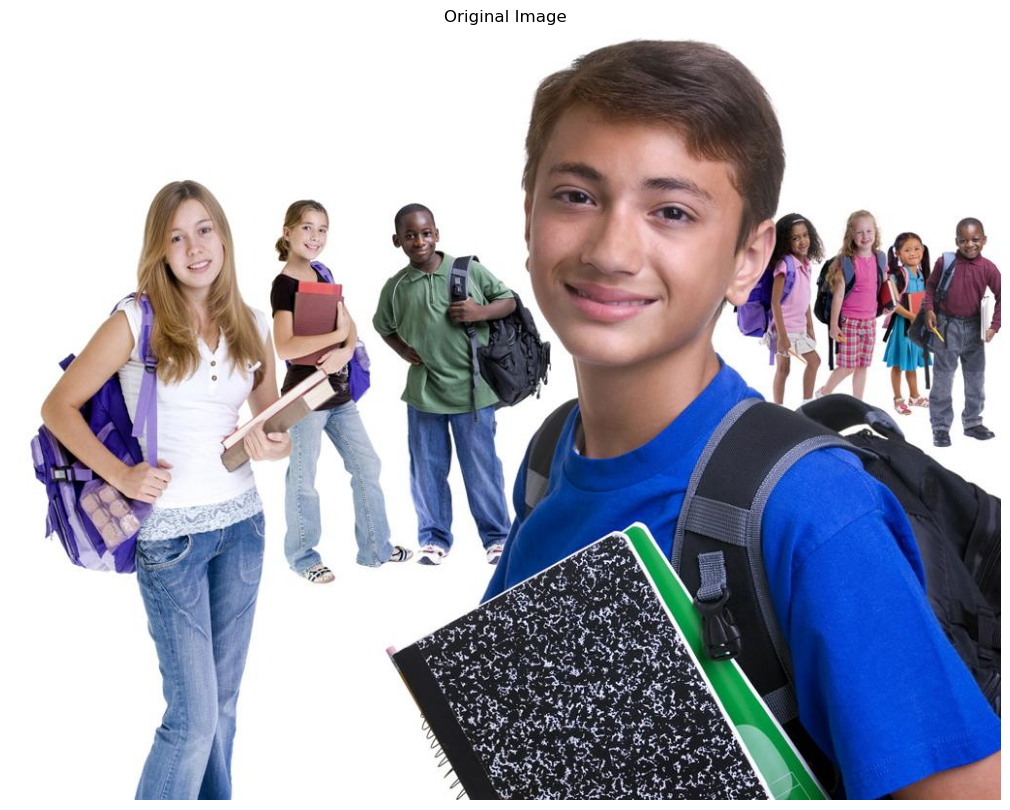

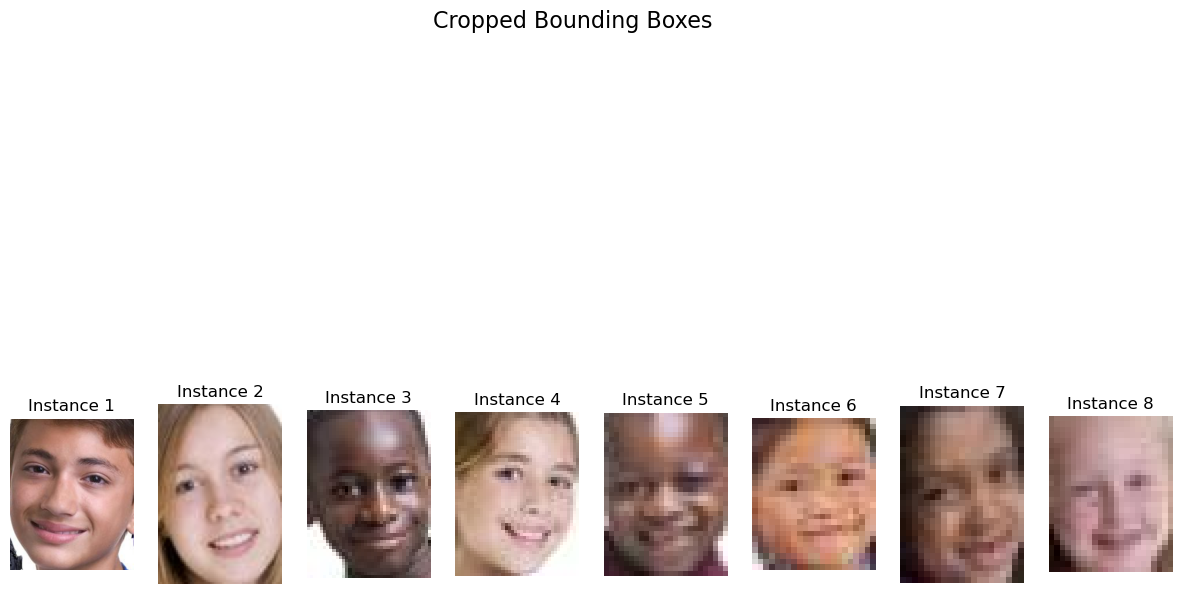

In [21]:
import cv2
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO


def crop_bounding_boxes_and_display_all(image_path, model):
    # Run inference on the selected image
    results = model.predict(source=image_path, save=False, show=False)
    
    # Load the original image using OpenCV
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for plotting

    # Plot the original image
    plt.figure(figsize=(15, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title('Original Image')
    plt.show()

    # Iterate through the results and extract bounding boxes
    for result in results:
        num_boxes = len(result.boxes)
        if num_boxes == 0:
            print("No instances detected in the image.")
            return
        
        # Create subplots for all bounding boxes
        fig, axs = plt.subplots(1, num_boxes, figsize=(15, 10))
        fig.suptitle('Cropped Bounding Boxes', fontsize=16)

        if num_boxes == 1:
            axs = [axs]  # Ensure axs is a list for consistent handling

        for idx, box in enumerate(result.boxes.xyxy):  # Access bounding boxes in xyxy format
            x1, y1, x2, y2 = map(int, box)  # Get coordinates and convert to integer
            
            # Crop the image based on the bounding box
            cropped_image = image_rgb[y1:y2, x1:x2]

            # Display the cropped image
            axs[idx].imshow(cropped_image)
            axs[idx].axis('off')
            axs[idx].set_title(f'Instance {idx + 1}')

        plt.show()  # Show all the cropped instances together

# Example usage
images_dir = 'Test/images/'
image_files = [os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith('.jpg')]

if len(image_files) > 0:
    random_image = random.choice(image_files)
    print(f"Randomly selected image: {random_image}")
    crop_bounding_boxes_and_display_all(random_image, trained_model)
else:
    print("No images found in the directory.")